In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import least_squares

In [2]:
def generate_data(t,A,sigma,omega,noise=0,n_outliers=0, random_state=0):
    y=A*np.exp(-sigma*t)*np.sin(omega*t)
    rnd=np.random.RandomState(random_state)
    error=noise*rnd.randn(t.size)
    outliers=rnd.randint(0,t.size,n_outliers)
    error[outliers]*=35
    return y+error

In [4]:
A=2
sigma=0.1
omega=.1*2*np.pi
x_true=np.array([A, sigma, omega])

noise=0.1

t_min=0
t_max=30

In [17]:
t_train=np.linspace(t_min,t_max,30)
y_train=generate_data(t_train,A,sigma,omega,noise=noise, n_outliers=4)

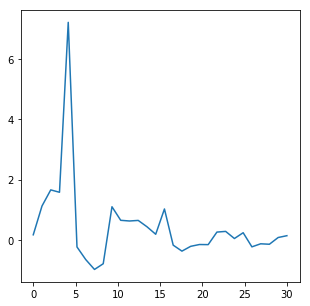

In [18]:

fig=plt.figure(figsize=(5,5))

ax1=fig.add_subplot(111)
ax1.plot(t_train,y_train)

plt.show()

In [19]:
def fun(x,t,y):
    return x[0]*np.exp(-x[1]*t)*np.sin(x[2]*t)-y

In [23]:
x0=np.ones(3)

res_lsq=least_squares(fun,x0,args=(t_train,y_train))

res_robust=least_squares(fun,x0,loss='soft_l1',f_scale=0.1, args=(t_train,y_train))

In [31]:
t_test=np.linspace(t_min,t_max,300)
y_test=generate_data(t_test,A,sigma,omega)

In [26]:
y_lsq=generate_data(t_test,*res_lsq.x)
y_robust=generate_data(t_test,*res_robust.x)

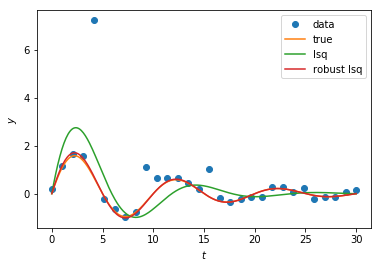

In [32]:
plt.plot(t_train,y_train,'o',label='data')
plt.plot(t_test,y_test,label='true')
plt.plot(t_test,y_lsq,label='lsq')
plt.plot(t_test,y_robust,label='robust lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();